In [1]:
import pandas as pd
import numpy as np
import os
from os.path import join, exists
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
datasets = ["A", "B", "C", "D"]
splits = ["random", "partitioned"]

In [14]:
template = "embdim512_DRIAMS-{}_{}_sp0_results"


cnn_metrics_df = []

for dset in datasets:
    for sp in splits:
        
        
        for i in range(5):
            try:
                with open(join("outputs/ResAMR", template.format(dset, sp), f"test_metrics_{i}.json"), "r") as f:
                    met = json.load(f)
                met["dataset"] = dset
                met["split"] = sp
                met["seed"]=i
                cnn_metrics_df.append(met)
                # print(met)
            except:
                continue
    
cnn_metrics_df = pd.DataFrame(cnn_metrics_df)
# cnn_metrics_df = cnn_metrics_df.drop("test_loss", axis=1)
cnn_metrics_df["projection"] = "CNN"
cnn_metrics_df

,test_loss,test_mcc,test_balanced_accuracy,test_f1,test_AUPRC,test_precision,test_recall,dataset,split,seed,projection
0,0.536298,0.706698,0.817414,0.739415,0.842607,0.855348,0.656729,B,random,0,CNN
1,0.878972,0.575526,0.725445,0.593991,0.718507,0.841737,0.468534,B,random,1,CNN
2,0.461199,0.707105,0.830420,0.744360,0.839588,0.821199,0.690982,B,random,2,CNN
3,0.448180,0.789185,0.874428,0.818109,0.888223,0.878713,0.770437,B,random,3,CNN
4,1.069007,0.457474,0.689061,0.508365,0.624445,0.666246,0.419481,B,random,4,CNN
5,3.119132,0.349319,0.648676,0.426334,0.469841,0.575391,0.369701,B,partitioned,0,CNN
6,1.500552,0.403820,0.672733,0.464366,0.576594,0.630944,0.399828,B,partitioned,3,CNN
7,0.926385,0.687413,0.818469,0.749547,0.832833,0.843319,0.678574,C,random,0,CNN
8,1.466115,0.563601,0.740184,0.630168,0.758473,0.807172,0.522096,C,random,1,CNN
9,1.508367,0.596075,0.739864,0.635502,0.767824,0.891308,0.499960,C,random,2,CNN


In [15]:
template = "noCNN_emb512_DRIAMS-{}_{}_sp0_results"

linear_metrics_df = []

for dset in datasets:
    for sp in splits:

        for i in range(5):
            try:
                with open(join("outputs/ResAMR", template.format(dset, sp), f"test_metrics_{i}.json"), "r") as f:
                    met = json.load(f)
                met["dataset"] = dset
                met["split"] = sp
                met["seed"]=i
                # met["species_embedding_dim"]=dim
                linear_metrics_df.append(met)
            except:
                continue
    
linear_metrics_df = pd.DataFrame(linear_metrics_df)
# metrics_df = metrics_df.drop("test_loss", axis=1)
linear_metrics_df["projection"] = "Linear"
linear_metrics_df

,test_loss,test_mcc,test_balanced_accuracy,test_f1,test_AUPRC,test_precision,test_recall,dataset,split,seed,projection
0,0.238506,0.797452,0.905410,0.837694,0.910368,0.822643,0.858508,A,random,0,Linear
1,0.232691,0.817554,0.904110,0.852409,0.920029,0.869181,0.840926,A,random,1,Linear
2,0.244668,0.801275,0.887048,0.836842,0.914834,0.881153,0.801867,A,random,2,Linear
3,0.229450,0.808137,0.895492,0.843595,0.913120,0.872547,0.821838,A,random,3,Linear
4,0.233603,0.815735,0.891724,0.848011,0.924749,0.899784,0.806647,A,random,4,Linear
5,1.247707,0.256952,0.618107,0.345141,0.417013,0.424378,0.328231,A,partitioned,0,Linear
6,1.265350,0.300119,0.647142,0.398548,0.435449,0.435657,0.404570,A,partitioned,1,Linear
7,1.255466,0.317792,0.675887,0.427888,0.444770,0.400629,0.505671,A,partitioned,2,Linear
8,1.349852,0.238007,0.619570,0.345660,0.373678,0.377637,0.360308,A,partitioned,3,Linear
9,1.391258,0.287453,0.649472,0.406990,0.424746,0.412047,0.441950,A,partitioned,4,Linear


In [19]:
metrics_df = pd.concat((linear_metrics_df, cnn_metrics_df))
metrics_df = metrics_df[metrics_df["split"]=="random"]
metrics_df = metrics_df[metrics_df["dataset"]!="A"]
metrics_df

,test_loss,test_mcc,test_balanced_accuracy,test_f1,test_AUPRC,test_precision,test_recall,dataset,split,seed,projection
10,0.386017,0.801644,0.902318,0.832918,0.878453,0.832423,0.838817,B,random,0,Linear
11,0.322556,0.795338,0.893189,0.826505,0.889837,0.841970,0.817266,B,random,1,Linear
12,0.427623,0.751074,0.892206,0.790203,0.844598,0.755409,0.838530,B,random,2,Linear
13,0.360609,0.801409,0.903069,0.831831,0.875623,0.831730,0.840222,B,random,3,Linear
14,0.388045,0.777613,0.899585,0.812157,0.879409,0.790490,0.844037,B,random,4,Linear
20,0.338141,0.819421,0.900442,0.861210,0.926805,0.892963,0.834953,C,random,0,Linear
21,0.414715,0.818155,0.907850,0.862137,0.927931,0.867723,0.859561,C,random,1,Linear
22,0.483160,0.801370,0.888910,0.846104,0.910631,0.888346,0.812109,C,random,2,Linear
23,0.538932,0.781072,0.871811,0.826726,0.909545,0.893886,0.773763,C,random,3,Linear
24,0.393836,0.824131,0.904894,0.865652,0.926647,0.891381,0.844302,C,random,4,Linear


In [20]:
plot_df = pd.melt(metrics_df.reset_index(), id_vars=["dataset", "split", "seed", "projection"], value_vars=[c for c in metrics_df.columns if c.startswith("test")])
plot_df

,dataset,split,seed,projection,variable,value
0,B,random,0,Linear,test_loss,0.386017
1,B,random,1,Linear,test_loss,0.322556
2,B,random,2,Linear,test_loss,0.427623
3,B,random,3,Linear,test_loss,0.360609
4,B,random,4,Linear,test_loss,0.388045
...,...,...,...,...,...,...
191,C,random,3,CNN,test_recall,0.807214
192,C,random,4,CNN,test_recall,0.678247
193,D,random,0,CNN,test_recall,0.540855
194,D,random,2,CNN,test_recall,0.566683


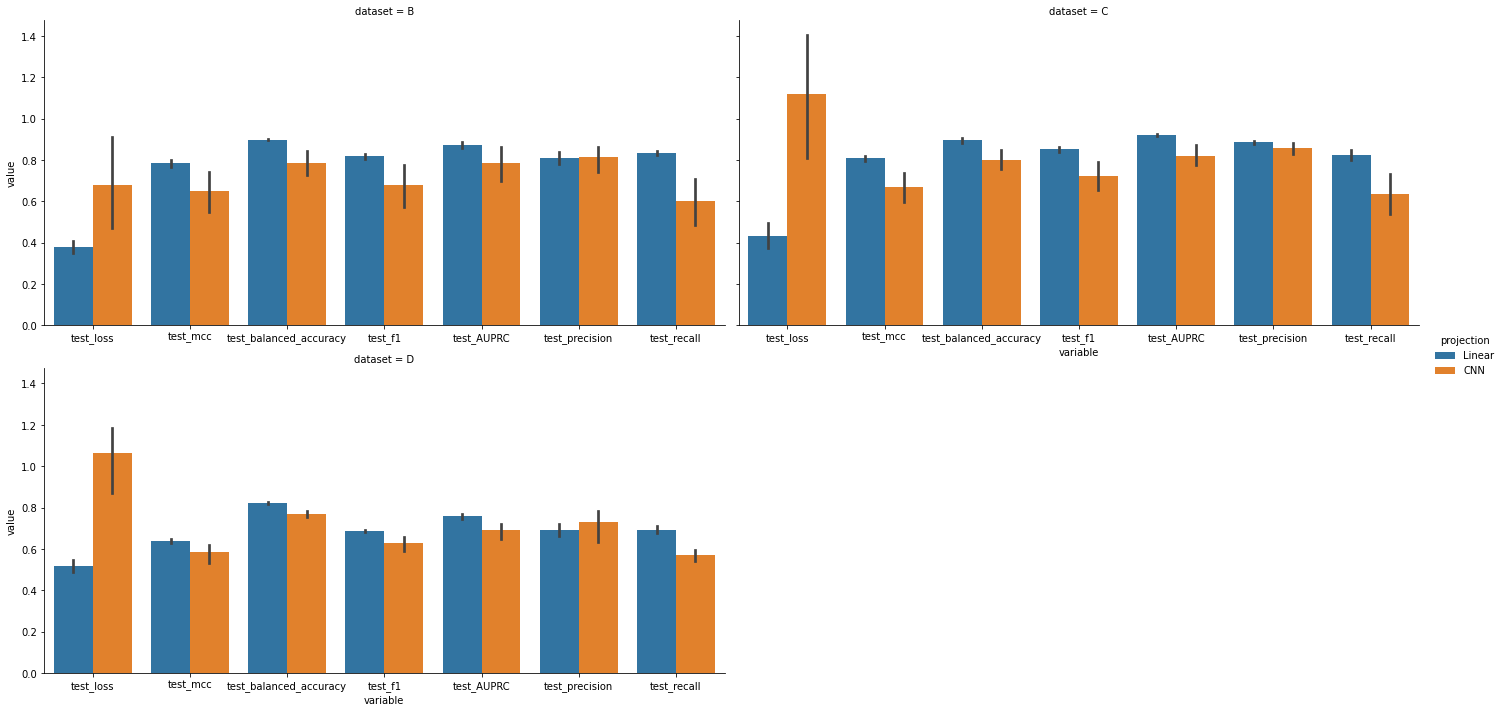

In [23]:
sns.catplot(
    data=plot_df, x="variable", y="value", hue="projection", col="dataset", col_wrap=2,
    kind="bar", height=5, aspect=2.0, sharex=False
)